# Text Summarization Using BERT

In [ ]:
! pip3 install -q kaggle

from google.colab import files
files.upload()

! mkdir ~/.kaggle

! cp kaggle.json /root/.kaggle

! chmod 600 /root/.kaggle/kaggle.json

! kaggle datasets download -d gowrishankarp/newspaper-text-summarization-cnn-dailymail

! unzip newspaper-text-summarization-cnn-dailymail.zip

Saving kaggle.json to kaggle.json
100% 503M/503M [00:17<00:00, 33.0MB/s]
100% 503M/503M [00:17<00:00, 30.2MB/s]
Archive:  newspaper-text-summarization-cnn-dailymail.zip
  inflating: cnn_dailymail/test.csv  
  inflating: cnn_dailymail/train.csv  
  inflating: cnn_dailymail/validation.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
dataset_dir = os.path.join("/content","cnn_dailymail")

In [ ]:
os.listdir(dataset_dir)

['train.csv', 'validation.csv', 'test.csv']

In [ ]:
train_data = pd.read_csv("cnn_dailymail/train.csv")
train_data.head(10)

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...
5,0004306354494f090ee2d7bc5ddbf80b63e80de6,He's been accused of making many a fashion fau...,Prime Minister and his family are enjoying an ...
6,0005d61497d21ff37a17751829bd7e3b6e4a7c5c,By . Daily Mail Reporter . PUBLISHED: . 01:15 ...,NBA star calls for black and Hispanic communit...
7,0006021f772fad0aa78a977ce4a31b3faa6e6fe5,By . Daily Mail Reporter . This is the moment ...,London Midland service had been pulling into T...
8,00083697263e215e5e7eda753070f08aa374dd45,There are a number of job descriptions waiting...,Tony Pulis believes Saido Berahino should look...
9,000940f2bb357ac04a236a232156d8b9b18d1667,"Canberra, Australia (CNN) -- At first glance, ...",Black box data from Flight 370 could be analyz...


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287113 entries, 0 to 287112
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          287113 non-null  object
 1   article     287113 non-null  object
 2   highlights  287113 non-null  object
dtypes: object(3)
memory usage: 6.6+ MB


In [ ]:
train_data["article"] = train_data.article.apply(lambda x: "".join(x.split("\n")))
train_data["highlights"] = train_data.highlights.apply(lambda x: "".join(x.split("\n"))) 
# train_data["art_sents"] = train_data.article.apply(lambda x: len([x for x in nlp(x).sents])) 
# train_data.info()

In [ ]:
print(isinstance(train_data["highlights"][0], str))
print(isinstance(train_data["article"][0], str))

True
True


In [ ]:
import random
for i in range(3):
  #rand_num = random.randint(0,len(train_data))
  rand_num = i
  print("\n\nOriginal - ",train_data["article"][rand_num])
  print("Length =",len(train_data["article"][rand_num].split()))
  print("\nSummarized - ",train_data["highlights"][rand_num])
  print("Length =",len(train_data["highlights"][rand_num].split()))



Original -  By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 October 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A virus in late September and early October. The state Health Department has issued an advisory of exposure for anyone who attended five churches and took communion. Bishop John Folda (pictured) of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A . State Immunization Program Manager Molly Howell says the risk is low, but officials feel it's important to alert people to the possible exposure. The diocese announced on Monday that Bishop John Folda is taking time off after being diagnosed with hepatitis A. The diocese says he contracted the infection through contaminated food while attending a conference for ne

In [ ]:
train_data["article_length"] = train_data["article"].apply(lambda x: len(x.split()))
train_data["highlights_length"] = train_data["highlights"].apply(lambda x: len(x.split()))

In [ ]:
train_data.head(10)

,id,article,highlights,article_length,highlights_length
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ...",198,35
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...,392,36
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t...",808,65
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...,531,51
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...,580,62
5,0004306354494f090ee2d7bc5ddbf80b63e80de6,He's been accused of making many a fashion fau...,Prime Minister and his family are enjoying an ...,334,40
6,0005d61497d21ff37a17751829bd7e3b6e4a7c5c,By . Daily Mail Reporter . PUBLISHED: . 01:15 ...,NBA star calls for black and Hispanic communit...,742,22
7,0006021f772fad0aa78a977ce4a31b3faa6e6fe5,By . Daily Mail Reporter . This is the moment ...,London Midland service had been pulling into T...,621,51
8,00083697263e215e5e7eda753070f08aa374dd45,There are a number of job descriptions waiting...,Tony Pulis believes Saido Berahino should look...,609,55
9,000940f2bb357ac04a236a232156d8b9b18d1667,"Canberra, Australia (CNN) -- At first glance, ...",Black box data from Flight 370 could be analyz...,888,53


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287113 entries, 0 to 287112
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 287113 non-null  object
 1   article            287113 non-null  object
 2   highlights         287113 non-null  object
 3   article_length     287113 non-null  int64 
 4   highlights_length  287113 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.0+ MB


In [ ]:
# train_data.drop(["article_length","higlights_length"], axis=1)

In [ ]:
print("Mean of article lengths =",train_data["article_length"].mean())
print("Mean of highlights lengths =",train_data["highlights_length"].mean())

Mean of article lengths = 691.8694938926485
Mean of highlights lengths = 48.7842870228795


In [ ]:
print(train_data["article_length"].min())
print(train_data["article_length"].max())

8
2347


In [ ]:
print(train_data[train_data["article_length"]==8].article)
print(train_data[train_data["article_length"]==8].highlights)

Series([], Name: article, dtype: object)
Series([], Name: highlights, dtype: object)


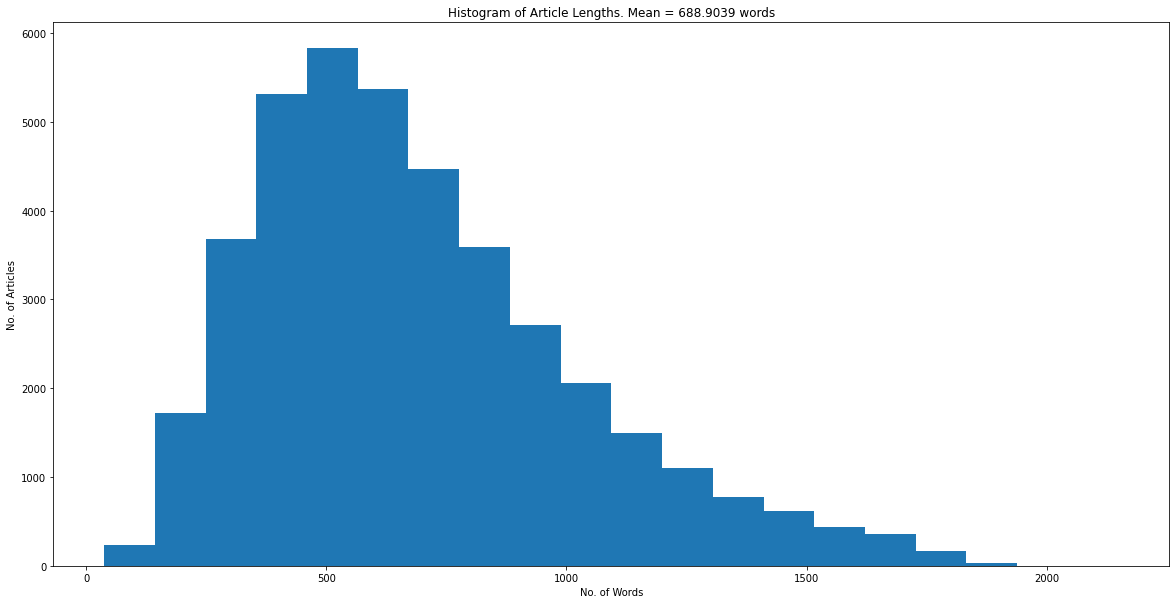

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(train_data.article_length,bins=20)
plt.xlabel("No. of Words")
plt.ylabel("No. of Articles")
plt.title("Histogram of Article Lengths. Mean = " + str(train_data["article_length"].mean()) + " words" );
plt.show()

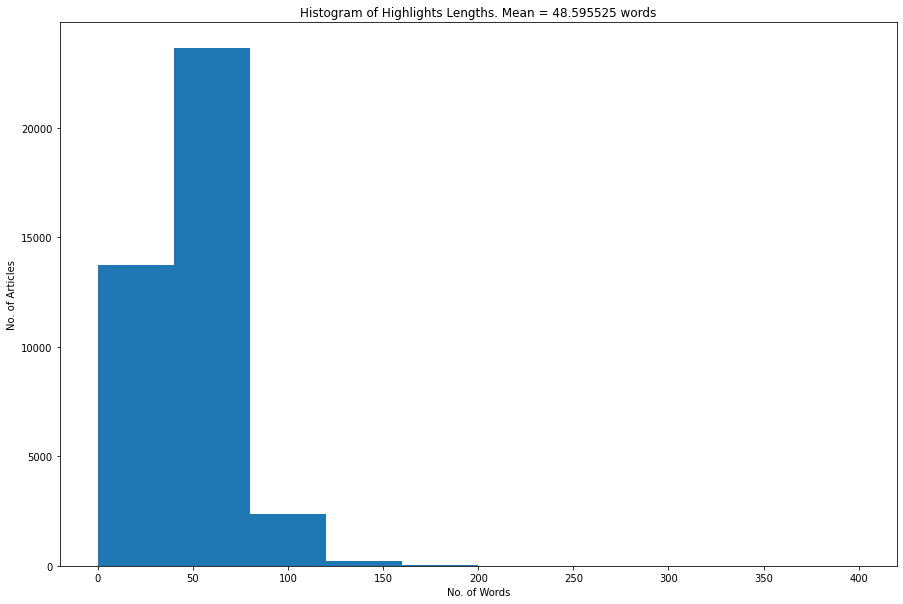

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(train_data.highlights_length,range=(0,400))
plt.xlabel("No. of Words")
plt.ylabel("No. of Articles")
plt.title("Histogram of Highlights Lengths. Mean = " + str(train_data["highlights_length"].mean()) + " words" );
plt.show()

In [ ]:
test_data = pd.read_csv("cnn_dailymail/test.csv")
test_data.head()

,id,article,highlights
0,92c514c913c0bdfe25341af9fd72b29db544099b,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...
1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...
2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...
3,caabf9cbdf96eb1410295a673e953d304391bfbb,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...
4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6..."


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11490 entries, 0 to 11489
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11490 non-null  object
 1   article     11490 non-null  object
 2   highlights  11490 non-null  object
dtypes: object(3)
memory usage: 269.4+ KB


## BERT pre-trained on CNN-DailyNews Dataset

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 25.3 MB/s 
     |████████████████████████████████| 7.6 MB 56.3 MB/s 
     |████████████████████████████████| 163 kB 77.3 MB/s 


In [ ]:
test_data["article"] = test_data["article"].apply(lambda x: "".join(x.split("\n")))
test_data["highlights"] = test_data["highlights"].apply(lambda x: "".join(x.split("\n")))

In [ ]:
print(test_data["article"][0])
print(test_data["highlights"][0])

Ever noticed how plane seats appear to be getting smaller and smaller? With increasing numbers of people taking to the skies, some experts are questioning if having such packed out planes is putting passengers at risk. They say that the shrinking space on aeroplanes is not only uncomfortable - it's putting our health and safety in danger. More than squabbling over the arm rest, shrinking space on planes putting our health and safety in danger? This week, a U.S consumer advisory group set up by the Department of Transportation said at a public hearing that while the government is happy to set standards for animals flying on planes, it doesn't stipulate a minimum amount of space for humans. 'In a world where animals have more rights to space and food than humans,' said Charlie Leocha, consumer representative on the committee. 'It is time that the DOT and FAA take a stand for humane treatment of passengers.' But could crowding on planes lead to more serious issues than fighting for space 

In [ ]:
from transformers import BertTokenizerFast, EncoderDecoderModel
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = BertTokenizerFast.from_pretrained('mrm8488/bert-small2bert-small-finetuned-cnn_daily_mail-summarization')
model = EncoderDecoderModel.from_pretrained('mrm8488/bert-small2bert-small-finetuned-cnn_daily_mail-summarization').to(device)

def generate_summary(text):
    # cut off at BERT max length 512
    inputs = tokenizer([text], padding="max_length", truncation=True, max_length=512, return_tensors="pt")
    input_ids = inputs.input_ids.to(device)
    attention_mask = inputs.attention_mask.to(device)

    output = model.generate(input_ids, attention_mask=attention_mask)

    return tokenizer.decode(output[0], skip_special_tokens=True)
  
text = test_data["article"][0]
generate_summary(text)


Downloading:   0%|          | 0.00/324 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/247M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1301: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 142 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


'u. s. consumer advisory group says shrinking space on aeroplanes is putting our health and safety in danger. tests conducted using planes with a 31 inch pitch, a standard which on some airlines has decreased. many economy seats on united airlines have 30 inches of room, while some airlines offer as little as 28 inches.'

In [ ]:
import tensorflow as tf
with tf.device('/gpu:0'):
  test_data["Summary By Model"] = test_data["article"].apply(lambda x: generate_summary(x))

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1301: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 142 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


In [ ]:
test_data = pd.read_csv("new_test_dataset.csv")

In [ ]:
test_data.head()

,Unnamed: 0,id,article,highlights,Summary By Model
0,0,92c514c913c0bdfe25341af9fd72b29db544099b,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...,u. s. consumer advisory group says shrinking s...
1,1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...,"rahul kumar, 17, jumped into the enclosure at ..."
2,2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...,dougie freedman is set to sign a new two - yea...
3,3,caabf9cbdf96eb1410295a673e953d304391bfbb,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...,liverpool were linked with a move for the fior...
4,4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6...",the former olympian will speak in a'far - rang...


In [ ]:
test_data = test_data.drop("Unnamed: 0", axis=1)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11490 entries, 0 to 11489
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11490 non-null  object
 1   article           11490 non-null  object
 2   highlights        11490 non-null  object
 3   Summary By Model  11490 non-null  object
dtypes: object(4)
memory usage: 359.2+ KB


In [ ]:
test_data.to_csv(r'/content/new_test_dataset.csv')

In [ ]:
test_data["article_length"] = test_data.article.apply(lambda x: len(x.split()))
test_data["highlights_length"] = test_data.highlights.apply(lambda x: len(x.split()))
test_data["model_summary_length"] = test_data["Summary By Model"].apply(lambda x: len(x.split()))

In [ ]:
test_data.head()

,id,article,highlights,Summary By Model,article_length,highlights_length,model_summary_length
0,92c514c913c0bdfe25341af9fd72b29db544099b,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...,u. s. consumer advisory group says shrinking s...,370,34,55
1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...,"rahul kumar, 17, jumped into the enclosure at ...",311,36,56
2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...,dougie freedman is set to sign a new two - yea...,110,33,53
3,caabf9cbdf96eb1410295a673e953d304391bfbb,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...,liverpool were linked with a move for the fior...,308,41,50
4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6...",the former olympian will speak in a'far - rang...,749,59,64


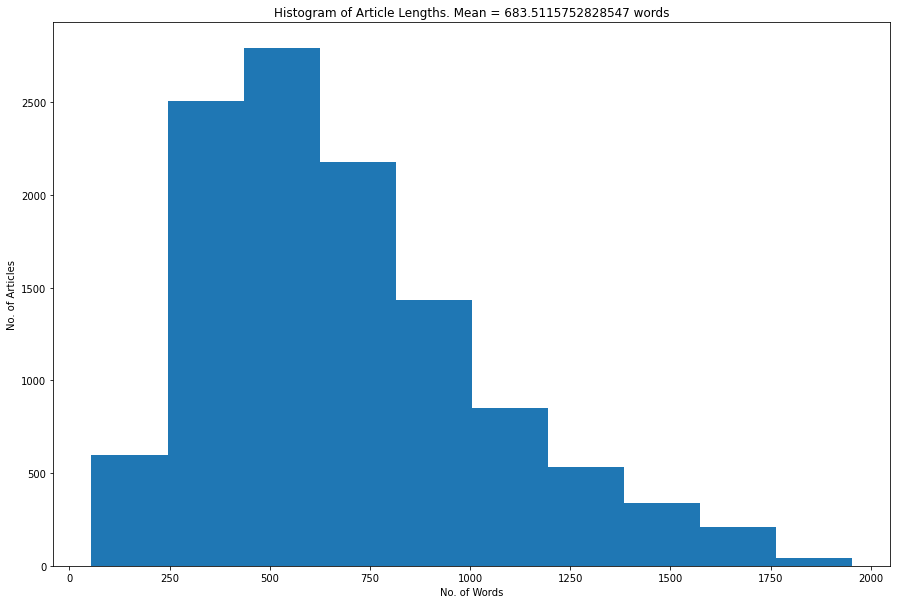

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(test_data.article_length)
plt.xlabel("No. of Words")
plt.ylabel("No. of Articles")
plt.title("Histogram of Article Lengths. Mean = " + str(test_data["article_length"].mean()) + " words" );
plt.show()

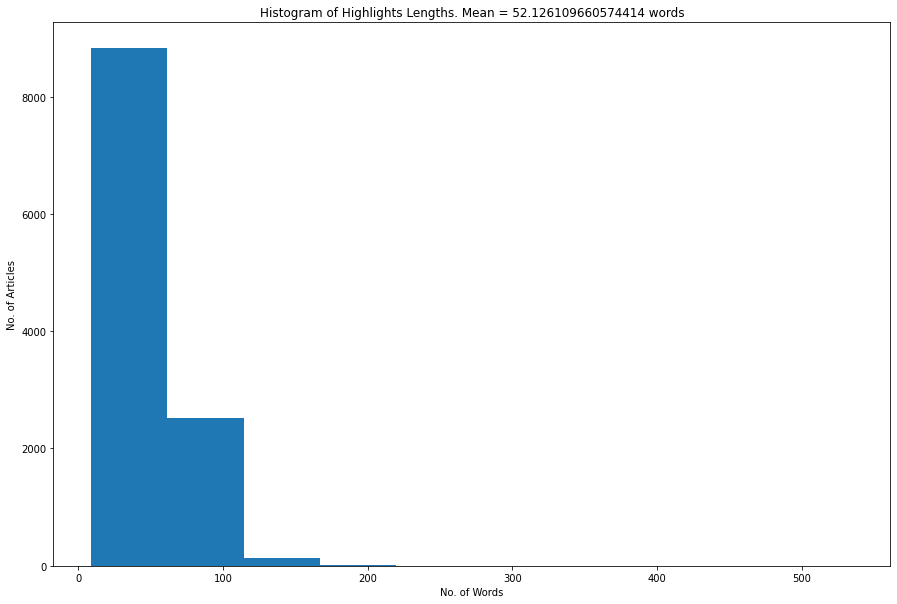

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(test_data.highlights_length)
plt.xlabel("No. of Words")
plt.ylabel("No. of Articles")
plt.title("Histogram of Highlights Lengths. Mean = " + str(test_data["highlights_length"].mean()) + " words" );
plt.show()

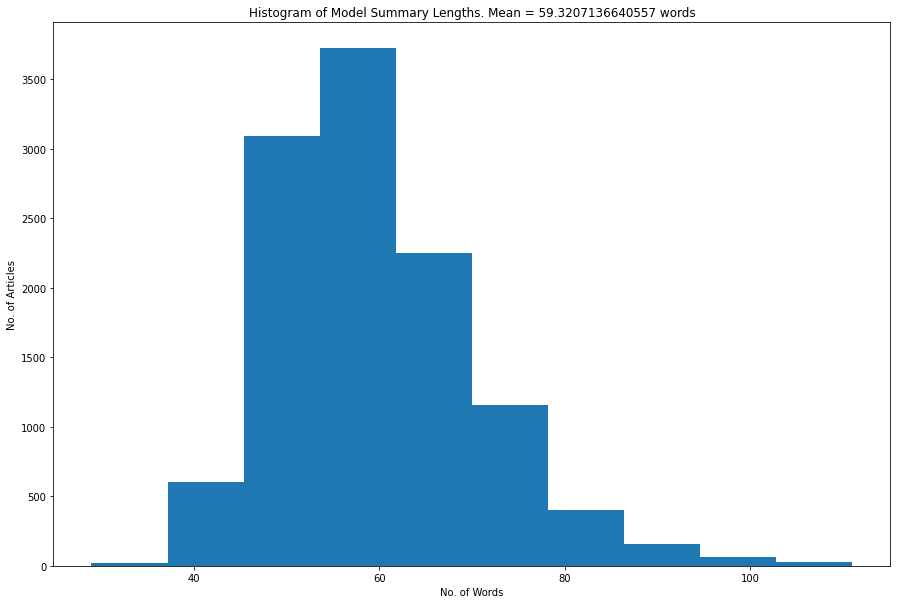

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(test_data.model_summary_length)
plt.xlabel("No. of Words")
plt.ylabel("No. of Articles")
plt.title("Histogram of Model Summary Lengths. Mean = " + str(test_data["model_summary_length"].mean()) + " words" );
plt.show()

In [ ]:
!pip install rouge_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24956 sha256=8fcd8d2fe0d72bb865e9a0e34849126da5d029ca5c158f8024692153c6a779c7
  Stored in directory: /root/.cache/pip/wheels/84/ac/6b/38096e3c5bf1dc87911e3585875e21a3ac610348e740409c76
Successfully built rouge-score


In [ ]:
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 1.3 MB/s 
     |████████████████████████████████| 441 kB 29.4 MB/s 
     |████████████████████████████████| 212 kB 32.0 MB/s 
     |████████████████████████████████| 163 kB 52.4 MB/s 
     |████████████████████████████████| 115 kB 56.7 MB/s 
     |████████████████████████████████| 95 kB 5.7 MB/s 
     |████████████████████████████████| 127 kB 68.5 MB/s 
     |████████████████████████████████| 115 kB 52.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: dill
    Found existing installation: dill 0.3.6
    Uninstalling dill-0.3.6:
      Successfully uninstalled dill-0.3.6


In [ ]:
print("Original Summary -", test_data["highlights"][0])
print("Predicted Summary -", test_data["Summary By Model"][0])

Original Summary - Experts question if  packed out planes are putting passengers at risk .U.S consumer advisory group says minimum space must be stipulated .Safety tests conducted on planes with more leg room than airlines offer .
Predicted Summary - u. s. consumer advisory group says shrinking space on aeroplanes is putting our health and safety in danger. tests conducted using planes with a 31 inch pitch, a standard which on some airlines has decreased. many economy seats on united airlines have 30 inches of room, while some airlines offer as little as 28 inches.


In [ ]:
import evaluate

rouge_score = evaluate.load("rouge")

In [ ]:
scores = rouge_score.compute(
    predictions=test_data["Summary By Model"], references=test_data["highlights"]
)
scores

{'rouge1': 0.39007359529219193,
 'rouge2': 0.1737790161968453,
 'rougeL': 0.26915123472894487,
 'rougeLsum': 0.26906539210761315}

## Fine-tuning T5 on CNN-DailyNews Dataset

In [ ]:
! pip install datasets transformers rouge-score nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 441 kB 19.5 MB/s 
     |████████████████████████████████| 5.5 MB 64.9 MB/s 
     |████████████████████████████████| 212 kB 51.0 MB/s 
     |████████████████████████████████| 115 kB 46.6 MB/s 
     |████████████████████████████████| 163 kB 57.3 MB/s 
     |████████████████████████████████| 95 kB 3.6 MB/s 
     |████████████████████████████████| 127 kB 55.8 MB/s 
     |████████████████████████████████| 7.6 MB 21.7 MB/s 
     |████████████████████████████████| 115 kB 45.3 MB/s 
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24955 sha256=0b8fbb23686e55942a33c1837f6dd62d47af8aff1e529aa74f5ece87207a809e
  Stored in directory: /root/.cache/pip/wheels/84/ac/6b/38096e3c5bf1dc87911e3585875e21a3ac610348e740409c76
Successfully built rouge-score
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
   

In [ ]:
from datasets import load_dataset, load_metric

In [ ]:
custom_train_dataset = pd.read_csv("/content/cnn_dailymail/train.csv")
custom_train_dataset.head()

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...


In [ ]:
custom_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287113 entries, 0 to 287112
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          287113 non-null  object
 1   article     287113 non-null  object
 2   highlights  287113 non-null  object
dtypes: object(3)
memory usage: 6.6+ MB


In [ ]:
custom_train_dataset = custom_train_dataset[:100000]
custom_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          100000 non-null  object
 1   article     100000 non-null  object
 2   highlights  100000 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [ ]:
custom_train_dataset.to_csv(r'/content/custom_train_dataset.csv', index=False)

In [ ]:
custom_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          100000 non-null  object
 1   article     100000 non-null  object
 2   highlights  100000 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [ ]:
custom_test_dataset = pd.read_csv("/content/cnn_dailymail/test.csv")
custom_test_dataset.head()

,id,article,highlights
0,92c514c913c0bdfe25341af9fd72b29db544099b,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...
1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...
2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...
3,caabf9cbdf96eb1410295a673e953d304391bfbb,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...
4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6..."


In [ ]:
custom_test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11490 entries, 0 to 11489
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11490 non-null  object
 1   article     11490 non-null  object
 2   highlights  11490 non-null  object
dtypes: object(3)
memory usage: 269.4+ KB


In [ ]:
custom_test_dataset = custom_test_dataset[:7000]

In [ ]:
custom_test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7000 non-null   object
 1   article     7000 non-null   object
 2   highlights  7000 non-null   object
dtypes: object(3)
memory usage: 164.2+ KB


In [ ]:
custom_test_dataset.to_csv(r'/content/custom_test_dataset.csv', index=False)

In [ ]:
dataset = load_dataset("csv", data_files={"train":"/content/custom_train_dataset.csv", "test":"/content/custom_test_dataset.csv"})

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-8e51d2154dc5be74/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
metric = load_metric("rouge")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  """Entry point for launching an IPython kernel.


In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'article', 'highlights'],
        num_rows: 100000
    })
    test: Dataset({
        features: ['id', 'article', 'highlights'],
        num_rows: 7000
    })
})

In [ ]:
dataset["train"][0]

{'id': '0001d1afc246a7964130f43ae940af6bc6c57f01',
 'article': "By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 October 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A virus in late September and early October. The state Health Department has issued an advisory of exposure for anyone who attended five churches and took communion. Bishop John Folda (pictured) of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A . State Immunization Program Manager Molly Howell says the risk is low, but officials feel it's important to alert people to the possible exposure. The diocese announced on Monday that Bishop John Folda is taking time off after being diagnosed with hepatitis A. The diocese says he contracted the infection through con

In [ ]:
metric

Metric(name: "rouge", features: {'predictions': Value(dtype='string', id='sequence'), 'references': Value(dtype='string', id='sequence')}, usage: """
Calculates average rouge scores for a list of hypotheses and references
Args:
    predictions: list of predictions to score. Each prediction
        should be a string with tokens separated by spaces.
    references: list of reference for each prediction. Each
        reference should be a string with tokens separated by spaces.
    rouge_types: A list of rouge types to calculate.
        Valid names:
        `"rouge{n}"` (e.g. `"rouge1"`, `"rouge2"`) where: {n} is the n-gram based scoring,
        `"rougeL"`: Longest common subsequence based scoring.
        `"rougeLSum"`: rougeLsum splits text using `"
"`.
        See details in https://github.com/huggingface/datasets/issues/617
    use_stemmer: Bool indicating whether Porter stemmer should be used to strip word suffixes.
    use_aggregator: Return aggregates if this is set to True
Retu

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("t5-small")

/usr/local/lib/python3.7/dist-packages/transformers/models/t5/tokenization_t5_fast.py:166: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,


In [ ]:
import tensorflow as tf

In [ ]:
prefix = "summarize: "
def preprocess_function(data):
    inputs = [prefix + doc for doc in data["article"]]
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True)

    labels = tokenizer(text_target=data["highlights"], max_length=64, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs


In [ ]:
with tf.device("/gpu:0"):
  tokenized_dataset = dataset.map(preprocess_function, batched=True)

  0%|          | 0/100 [00:00<?, ?ba/s]

  0%|          | 0/7 [00:00<?, ?ba/s]

In [ ]:
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer

model = AutoModelForSeq2SeqLM.from_pretrained("t5-small")

Downloading:   0%|          | 0.00/242M [00:00<?, ?B/s]

In [ ]:
# Show the training loss with every epoch
logging_steps = len(tokenized_dataset["train"]) // 8
model_name = "t5-small".split("/")[-1]
args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=2,
    predict_with_generate = True,
    fp16 = True
)

In [ ]:
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

In [ ]:
import nltk
nltk.download("all")
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    # Decode generated summaries into text
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    # Replace -100 in the labels as we can't decode them
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    # Decode reference summaries into text
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    # ROUGE expects a newline after each sentence
    decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]
    # Compute ROUGE scores
    result = metric.compute(
        predictions=decoded_preds, references=decoded_labels, use_stemmer=True
    )
    # Extract the median scores
    result = {key: value.mid.fmeasure * 100 for key, value in result.items()}
    return {k: round(v, 4) for k, v in result.items()}

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

Using cuda_amp half precision backend


In [ ]:
with tf.device("/gpu:0"):
  trainer.train()

The following columns in the training set don't have a corresponding argument in `T5ForConditionalGeneration.forward` and have been ignored: highlights, id, article. If highlights, id, article are not expected by `T5ForConditionalGeneration.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 100000
  Num Epochs = 2
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 25000
  Number of trainable parameters = 60506624
You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` metho

Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,1.886600,1.708060,27.748700,13.563700,23.157600,26.068700
2,1.867800,1.701596,27.736700,13.573600,23.156600,26.075400


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-500/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-500/special_tokens_map.json
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-1000/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-1000/special_tokens_map.json
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved in ./results/checkpoint-1500/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-1500/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-1500/special_toke

In [ ]:
trainer.evaluate()

The following columns in the evaluation set don't have a corresponding argument in `T5ForConditionalGeneration.forward` and have been ignored: highlights, id, article. If highlights, id, article are not expected by `T5ForConditionalGeneration.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 7000
  Batch size = 8


{'eval_loss': 1.701595664024353,
 'eval_rouge1': 27.7367,
 'eval_rouge2': 13.5736,
 'eval_rougeL': 23.1566,
 'eval_rougeLsum': 26.0754,
 'eval_runtime': 512.8552,
 'eval_samples_per_second': 13.649,
 'eval_steps_per_second': 1.706,
 'epoch': 2.0}

In [ ]:
trainer.save_model("./fined-tuned-T5-CNN")

Saving model checkpoint to ./fined-tuned-T5-CNN
Configuration saved in ./fined-tuned-T5-CNN/config.json
Model weights saved in ./fined-tuned-T5-CNN/pytorch_model.bin
tokenizer config file saved in ./fined-tuned-T5-CNN/tokenizer_config.json
Special tokens file saved in ./fined-tuned-T5-CNN/special_tokens_map.json


In [ ]:
!pip install huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from huggingface_hub import notebook_login

In [ ]:
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token


In [ ]:
#trainer.push_to_hub()

In [ ]:
from transformers import T5ForConditionalGeneration

model = T5ForConditionalGeneration.from_pretrained("alimazhar-110/fine-tuned-T5-CNN")

In [ ]:
def generate_summary(text):

    input_ids = tokenizer(text, return_tensors="pt").input_ids
    output_ids = model.generate(
      input_ids=input_ids,
      max_length=84,
    )[0]

    summary = tokenizer.decode(
      output_ids,
      skip_special_tokens=True,
      clean_up_tokenization_spaces=False
    )
    return summary
  
#text = test_data["article"][3]
#generate_summary(text)

In [ ]:
data = pd.read_csv("data_2.csv")
data.head()

,Title,Link,Summary,Description
0,Formula 1 | Russell: Our lifestyle is 'not hea...,https://lookcharms.com/formula-1-russell-our-...,On becoming a Mercedes F1 driver George Russe...,On becoming a Mercedes F1 driver George Russe...
1,Las Vegas hosts Formula 1 launch party ahead o...,https://www.motorsportweek.com/2022/11/06/las...,Las Vegas returns to the Formula 1 calendar i...,Las Vegas returns to the Formula 1 calendar i...
2,F1 teams among those targeted in global hackin...,https://racingnews365.com/f1-teams-among-thos...,Formula 1 teams and personnel are among those...,Formula 1 teams and personnel are among those...
3,Video: F1 pit-stops under two seconds are allo...,https://racingnews365.com/video-f1-pit-stops-...,A change in Formula 1 regulations this year h...,A change in Formula 1 regulations this year h...
4,F1 hits the jackpot with Vegas GP launch party,https://f1i.com/news/459503-f1-hits-the-jackp...,It might still be a year away from making its...,It might still be a year away from making its...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        910 non-null    object
 1   Link         910 non-null    object
 2   Summary      910 non-null    object
 3   Description  910 non-null    object
dtypes: object(4)
memory usage: 28.6+ KB


In [ ]:
with tf.device("/gpu:0"):
 data["Summary By Model"] = data["Description"].apply(lambda x: generate_summary(x))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             910 non-null    object
 1   Link              910 non-null    object
 2   Summary           910 non-null    object
 3   Description       910 non-null    object
 4   Summary By Model  910 non-null    object
dtypes: object(5)
memory usage: 35.7+ KB


In [ ]:
data.head()

,Title,Link,Summary,Description,Summary By Model
0,Formula 1 | Russell: Our lifestyle is 'not hea...,https://lookcharms.com/formula-1-russell-our-...,On becoming a Mercedes F1 driver George Russe...,On becoming a Mercedes F1 driver George Russe...,I am driven and motivated by winning races and...
1,Las Vegas hosts Formula 1 launch party ahead o...,https://www.motorsportweek.com/2022/11/06/las...,Las Vegas returns to the Formula 1 calendar i...,Las Vegas returns to the Formula 1 calendar i...,The launch party was hosted at Caesars Palace ...
2,F1 teams among those targeted in global hackin...,https://racingnews365.com/f1-teams-among-thos...,Formula 1 teams and personnel are among those...,Formula 1 teams and personnel are among those...,based in India and targeted more than 100 vict...
3,Video: F1 pit-stops under two seconds are allo...,https://racingnews365.com/video-f1-pit-stops-...,A change in Formula 1 regulations this year h...,A change in Formula 1 regulations this year h...,This year has seen the sport move from 13inch ...
4,F1 hits the jackpot with Vegas GP launch party,https://f1i.com/news/459503-f1-hits-the-jackp...,It might still be a year away from making its...,It might still be a year away from making its...,pictures Mexican GP Sundays action in pictures...


In [ ]:
import evaluate

rouge_score = evaluate.load("rouge")

scores = rouge_score.compute(
    predictions=df["Summary By Model"], references=df["Summary"]
)
scores

{'rouge1': 0.32878450413338445,
 'rouge2': 0.22422229742742328,
 'rougeL': 0.25746883116217445,
 'rougeLsum': 0.25816913569761357}

In [ ]:
len(df["Summary"][0].split(" "))

136

In [ ]:
len(df["Description"][0].split(" "))

415

In [ ]:
len(df["Summary By Model"][0].split(" "))

56

In [ ]:
data.to_csv(r'/content/f1_dataset_2.csv', index=False)

In [ ]:
test_data["highlights"][3]

'Fiorentina goalkeeper Neto has been linked with Liverpool and Arsenal .\nNeto joined Firoentina\xa0from Brazilian outfit Atletico Paranaense in 2011 .\nHe is also wanted by PSG and Spanish clubs, according to his agent .\nCLICK HERE for the latest Liverpool news .'

In [ ]:
print(test_data["article"][3])

Liverpool target Neto is also wanted by PSG and clubs in Spain as Brendan Rodgers faces stiff competition to land the Fiorentina goalkeeper, according to the Brazilian's agent Stefano Castagna. The Reds were linked with a move for the 25-year-old, whose contract expires in June, earlier in the season when Simon Mignolet was dropped from the side. A January move for Neto never materialised but the former Atletico Paranaense keeper looks certain to leave the Florence-based club in the summer. Neto rushes from his goal as Juan Iturbe bears down on him during Fiorentina's clash with Roma in March . Neto is wanted by a number of top European clubs including Liverpool and PSG, according to his agent . It had been reported that Neto had a verbal agreement to join Serie A champions Juventus at the end of the season but his agent has revealed no decision about his future has been made yet. And Castagna claims Neto will have his pick of top European clubs when the transfer window re-opens in the

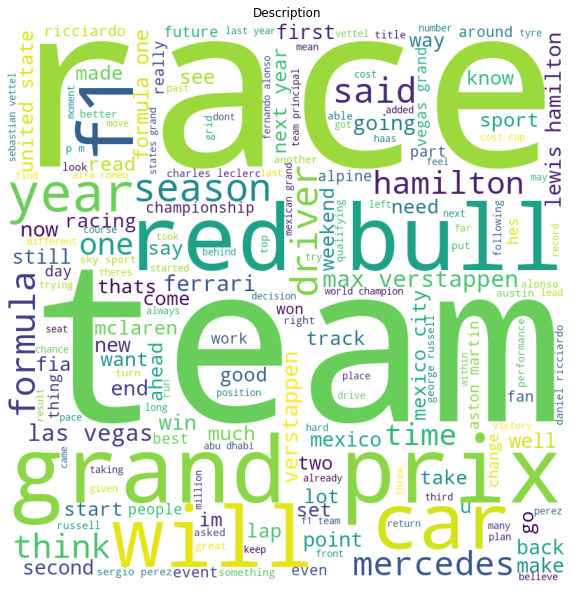

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv(r"f1_dataset_2.csv")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df["Description"]:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title("Description")
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

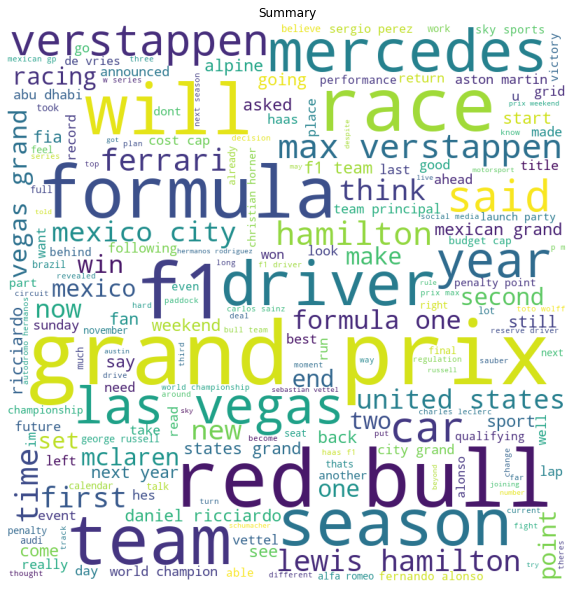

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df["Summary"]:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title("Summary")
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

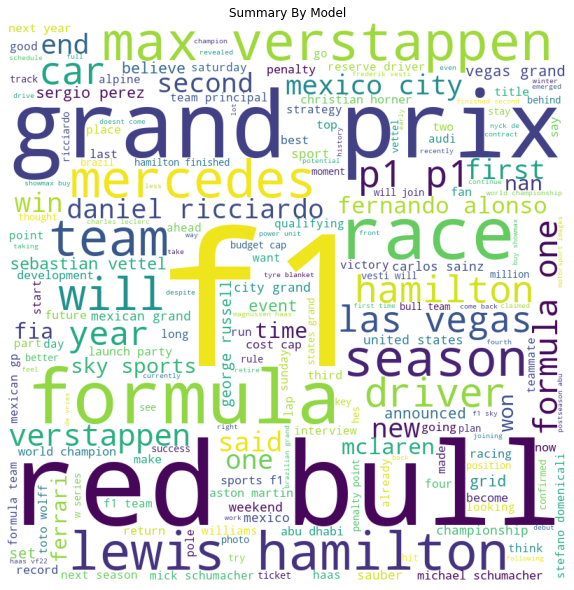

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df["Summary By Model"]:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title("Summary By Model")
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |       0 B  |       0 B  |       0 B  |       0 B  |
|       from large pool |       0 B  |       0 B  |       0 B  |       0 B  |
|       from small pool |       0 B  |       0 B  |       0 B  |       0 B  |
|---------------------------------------------------------------------------|
| Active memory         |       0 B  |       0 B  |       0 B  |       0 B  |
|       from large pool |       0 B  |       0 B  |       0 B  |